##2.One Hot Encoding
- Categorical data represents variables that contain label values rather than numeric values, often used to classify data into distinct groups or categories.

 For example, if you people responded to a survey about which what brand of car they owned, the result would be categorical (because the answers would be things like Honda, Toyota, Ford, None, etc.). Responses fall into a fixed set of categories.

- You will get an error if you try to plug these variables into most machine learning models in Python without "encoding" them first. Here we'll show the most popular method for encoding categorical variables.
In order to fit ML algorithms you have to convert categorical (non-numeric) variables to numeric features before building your model. This process is known as categorical data encoding. There are different encoding techniques available, but the most common and widely used is One Hot Encoding.

 There are two popular and commonly used methods:  scikit-learn OneHotEncoder(OHE) and Pandas get_dummies method.

 In essence: one-hot encoding creates a new column for each unique category in a categorical variable and assigns a binary value of 1 or 0 to indicate the presence or absence of that category in a given observation.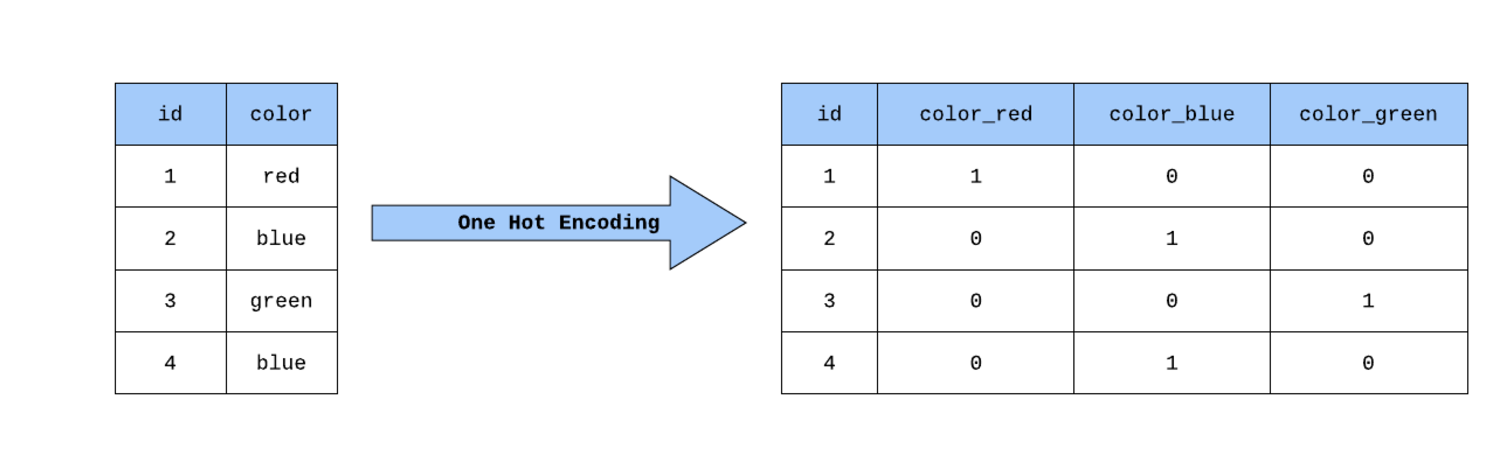



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Install Kaggle API and upload kaggle.json file for authentication
!pip install kaggle
from google.colab import files
files.upload()




Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyabangera","key":"880ce8863a711ab341c8d3126ed921ad"}'}

In [ ]:
# Set up the Kaggle API key
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:

# Download Titanic Dataset from Kaggle
!kaggle competitions download -c titanic

# Unzip the downloaded dataset
!unzip titanic.zip


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Check the 'Sex' and 'Embarked' columns
data[['Sex', 'Embarked']].head()

Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S

In [ ]:
# Apply One-Hot Encoding to 'Sex' and 'Embarked' columns
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the updated dataset with One-Hot Encoding applied
data_encoded.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN      True       False        True  
1          PC 17599  71.2833   C85     False       False       False  
2  STON/O2. 3101282   7.9250   NaN     False       False        True  
3            113803  53.1000  C123     False       False        True  
4            373450   8.0500   NaN      True       False        True

We can also use OneHotEncoder scikit-learn library

In [ ]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first')

In [ ]:
# Apply OneHotEncoder to the 'Sex' and 'Embarked' columns using a ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('sex_embarked', encoder, ['Sex', 'Embarked'])  # Encoding the 'Sex' and 'Embarked' columns
    ], remainder='passthrough'  # Keep other columns unchanged
)

In [ ]:
# Transform the dataset
data_encoded = column_transformer.fit_transform(data)

In [ ]:
# Convert the resulting numpy array back to a DataFrame
encoded_columns = column_transformer.get_feature_names_out()
data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_columns)

# Display the encoded dataframe
data_encoded_df.head(20)

sex_embarked__Sex_male sex_embarked__Embarked_Q sex_embarked__Embarked_S  \
0                     1.0                      0.0                      1.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      1.0   
3                     0.0                      0.0                      1.0   
4                     1.0                      0.0                      1.0   
5                     1.0                      1.0                      0.0   
6                     1.0                      0.0                      1.0   
7                     1.0                      0.0                      1.0   
8                     0.0                      0.0                      1.0   
9                     0.0                      0.0                      0.0   
10                    0.0                      0.0                      1.0   
11                    0.0                      0.0                      1.0   
12                    1.0                      0.0                      1.0   
13                    1.0                      0.0                      1.0   
14                    0.0                      0.0                      1.0   
15                    0.0                      0.0                      1.0   
16                    1.0                      1.0                      0.0   
17                    1.0                      0.0                      1.0   
18                    0.0                      0.0                      1.0   
19                    0.0                      0.0                      0.0   

   sex_embarked__Embarked_nan remainder__PassengerId remainder__Survived  \
0                         0.0                      1                   0   
1                         0.0                      2                   1   
2                         0.0                      3                   1   
3                         0.0                      4                   1   
4                         0.0                      5                   0   
5                         0.0                      6                   0   
6                         0.0                      7                   0   
7                         0.0                      8                   0   
8                         0.0                      9                   1   
9                         0.0                     10                   1   
10                        0.0                     11                   1   
11                        0.0                     12                   1   
12                        0.0                     13                   0   
13                        0.0                     14                   0   
14                        0.0                     15                   0   
15                        0.0                     16                   1   
16                        0.0                     17                   0   
17                        0.0                     18                   1   
18                        0.0                     19                   0   
19                        0.0                     20                   1   

   remainder__Pclass                                    remainder__Name  \
0                  3                            Braund, Mr. Owen Harris   
1                  1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2                  3                             Heikkinen, Miss. Laina   
3                  1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4                  3                           Allen, Mr. William Henry   
5                  3                                   Moran, Mr. James   
6                  1                            McCarthy, Mr. Timothy J   
7                  3                     Palsson, Master. Gosta Leonard   
8                  3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)